<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/NLP_Applying_Statistics_On_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://liferay.de.dariah.eu/tatom/_downloads/datasets.zip

--2019-06-23 22:15:17--  https://liferay.de.dariah.eu/tatom/_downloads/datasets.zip
Resolving liferay.de.dariah.eu (liferay.de.dariah.eu)... 134.76.30.131
Connecting to liferay.de.dariah.eu (liferay.de.dariah.eu)|134.76.30.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57659024 (55M) [application/zip]
Saving to: ‘datasets.zip’

datasets.zip        100%[===================>]  54.99M  19.9MB/s    in 2.8s    

2019-06-23 22:15:21 (19.9 MB/s) - ‘datasets.zip’ saved [57659024/57659024]



In [0]:
!unzip /content/datasets.zip

In [0]:
import os
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 

In [0]:
CORPUS_PATH = "/content/data/austen-brontë"

In [0]:
filenames = os.listdir(CORPUS_PATH)

In [0]:
filenames_with_path = [os.path.join(CORPUS_PATH, fn) for fn in filenames]

In [7]:
filenames_with_path

['/content/data/austen-brontë/CBronte_Professor.txt',
 '/content/data/austen-brontë/CBronte_Jane.txt',
 '/content/data/austen-brontë/CBronte_Villette.txt',
 '/content/data/austen-brontë/Austen_Sense.txt',
 '/content/data/austen-brontë/Austen_Pride.txt',
 '/content/data/austen-brontë/Austen_Emma.txt']

In [0]:
"""
The idea is to create document-term matrix using rate rather than count
"""

raw_texts=[]

for fn in filenames_with_path:
  with open(fn, "r") as fp:
    text = fp.read()
    text = text.replace('_', '')
    raw_texts.append(text)

In [0]:
vectorizer = CountVectorizer(input="content")
dtm = vectorizer.fit_transform(raw_texts)
vocab = np.array(vectorizer.get_feature_names())

In [0]:
dtm = dtm.toarray() # fit_transform returns a sparse matrix we want normal numpy array.

In [11]:
dtm.shape

(6, 22524)

In [12]:
np.sum(dtm, axis=1, keepdims=True).shape

(6, 1)

In [0]:
rates = 1000 * dtm / np.sum(dtm, axis=1, keepdims=True)

In [14]:
vocab[100:105]

array(['abdiel', 'abdy', 'abed', 'aberdeen', 'aberration'], dtype='<U20')

In [15]:
rates[:, 100:105]

array([[0.01189641, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00541237, 0.00541237, 0.00541237],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00646634, 0.        , 0.        , 0.        ]])

Measuring “distinctiveness”

In [0]:
austen_indices, cbronte_indices = [], []

In [0]:
for index, fname in enumerate(filenames):
  if "Austen" in fname:
    austen_indices.append(index)
  if "CBronte" in fname:
    cbronte_indices.append(index)

In [0]:
austen_rates  = rates[austen_indices, :]
cbronte_rates = rates[cbronte_indices, :]

In [22]:
austen_rates.shape

(3, 22524)

In [23]:
np.mean(austen_rates, axis=0).shape

(22524,)

In [0]:
austen_rates_avg  = np.mean(austen_rates, axis=0)
cbronte_rates_avg = np.mean(cbronte_rates, axis=0) 

In [0]:
distinctive_indices = (austen_rates_avg * cbronte_rates_avg) == 0

In [27]:
print("Number of Distinct Words", np.count_nonzero(distinctive_indices))

Number of Distinct Words 14414


In [0]:
ranking = np.argsort(austen_rates_avg[distinctive_indices] + cbronte_rates_avg[distinctive_indices])[::-1]

In [29]:
vocab[distinctive_indices][ranking]

array(['elinor', 'emma', 'marianne', ..., 'incautious', 'incedingly',
       'kitten'], dtype='<U20')

In [42]:
austen_rates_avg[ranking[:10]]

array([0.00287649, 0.        , 0.        , 0.02150875, 0.0207343 ,
       0.        , 0.        , 0.00215545, 0.00785502, 0.        ])

In [43]:
cbronte_rates_avg[ranking[:10]]

array([0.        , 0.01342733, 0.00188815, 0.03711187, 0.00180412,
       0.00396547, 0.00180412, 0.        , 0.0342392 , 0.02135827])

In [37]:
distinctive_indices

array([ True, False,  True, ...,  True,  True,  True])

In [36]:
np.invert(distinctive_indices)

array([False,  True, False, ..., False, False, False])

In [0]:
# Get non distinct indices
dtm = dtm[:, np.invert(distinctive_indices)]
rates = rates[:, np.invert(distinctive_indices)]
vocab = vocab[np.invert(distinctive_indices)]

In [0]:
austen_rates = rates[austen_indices, :]
cbronte_rates = rates[cbronte_indices, :]
austen_rates_avg = np.mean(austen_rates, axis=0)
cbronte_rates_avg = np.mean(cbronte_rates, axis=0)

In [0]:
keyness = np.abs(austen_rates_avg - cbronte_rates_avg)

In [0]:
rank_common = np.argsort(keyness)[::-1]

In [50]:
vocab[rank_common][:10] #The problem with this measure is that it tends to highlight differences in very frequent words. 

array(['the', 'to', 'her', 'my', 'me', 'be', 'and', 'she', 'mr', 'very'],
      dtype='<U20')

In [51]:
rates.shape

(6, 8110)

In [52]:
np.mean(rates, axis=0).shape

(8110,)

In [53]:
# heuristic : divide the difference in authors’ average rates by the average rate across all authors.

rate_avg = np.mean(rates, axis=0)
keyness = np.abs(austen_rates_avg - cbronte_rates_avg) / rate_avg
rank_heuristic = np.argsort(keyness)[::-1]
vocab[rank_heuristic][:10]

array(['madame', 'elizabeth', 'graham', 'lizzy', 'flowers', 'french',
       'lessons', 'smallest', 'clean', 'movement'], dtype='<U20')

In [54]:
austen_rates_avg[rank_heuristic[:10]]

array([0.00215545, 1.80990467, 0.00215545, 0.27101648, 0.00215545,
       0.00497853, 0.00215545, 0.13169269, 0.00215545, 0.00215545])

In [55]:
cbronte_rates_avg[rank_heuristic[:10]]

array([0.84949837, 0.00549639, 0.40592763, 0.00188815, 0.2021599 ,
       0.42178536, 0.17249909, 0.00188815, 0.14383669, 0.1408171 ])

In [60]:
austen_rates[:2, rank_heuristic[:10]]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.17258936, 0.        , 0.        ],
       [0.        , 5.3779833 , 0.        , 0.81304944, 0.        ,
        0.00846927, 0.        , 0.09316192, 0.        , 0.        ]])

In [61]:
cbronte_rates[:2, rank_heuristic[:10]]

array([[0.55913109, 0.        , 0.        , 0.        , 0.21413531,
        0.71378437, 0.30930656, 0.        , 0.14275687, 0.1903425 ],
       [0.06797326, 0.00566444, 0.        , 0.00566444, 0.18126204,
        0.23224198, 0.05664439, 0.00566444, 0.16426872, 0.10762433]])

Log likelihood ratio and χ2 feature selection

One hypothesis that there is, in fact, a single group. Words are examined one at a time; those words for which this hypothesis seems most wrong will be counted as distinctive

In [64]:
green_austen = np.sum(dtm[austen_indices, vocab=="green"])
nongreen_austen = np.sum(dtm[austen_indices, :]) - green_austen

green_cbronte = np.sum(dtm[cbronte_indices, vocab=="green"])
nongreen_cbronte = np.sum(dtm[cbronte_indices, :]) - green_cbronte

green_table = np.array([
    [green_austen, nongreen_austen],
    [green_cbronte, nongreen_cbronte]
])

green_table

array([[    11, 374596],
       [    96, 404720]])

In [0]:
prob_green = np.sum(dtm[:, vocab=="green"])/np.sum(dtm)

prob_nongreen = 1 - prob_green

In [66]:
prob_green, prob_nongreen

(0.00013728103994878262, 0.9998627189600512)

In [0]:
n_austen = np.sum(dtm[[0,1,2], :])

In [0]:
n_cbronte = np.sum(dtm[[3,4,5], :])

In [71]:
n_austen, n_cbronte

(404816, 374607)

In [74]:
expected_table = np.array([
    [prob_green*n_austen, prob_nongreen*n_austen],
    [prob_green*n_cbronte, prob_nongreen*n_cbronte]
])

expected_table

array([[5.55740000e+01, 4.04760426e+05],
       [5.14260000e+01, 3.74555574e+05]])

array([[5.55735615e+01, 4.04760426e+05],
       [5.14264385e+01, 3.74555574e+05]])

In [76]:
"""The log likelihood ratio is calculated as follows:"""
G = np.sum(green_table * np.log(green_table / expected_table))

"""The higher the value of the test statistic, the more pronounced the deviation is 
from the hypothesis—and, for our purposes, the more “distinctive” the word is."""
G

2378.380894439568

In [0]:
#Pearson’s χ2 test statistic approximates the log likelihood ratio test 

from sklearn.feature_selection import chi2


In [0]:
labels = []
for fn in filenames:
  label = "Austen" if "Austen" in fn else "CBrontë"
  labels.append(label)

In [0]:
keyness, pv = chi2(dtm, labels)

In [0]:
ranking_x2 = np.argsort(keyness)[::-1]

In [87]:
vocab[ranking_x2][:10]

array(['me', 'my', 'the', 'mr', 'mrs', 'elizabeth', 'be', 'and', 'very',
       'every'], dtype='<U20')

In [86]:
pv[ranking_x2][:10]

array([0.00000000e+000, 7.74678231e-302, 2.73256921e-267, 4.05497089e-159,
       4.34837330e-143, 6.55755937e-140, 7.77933382e-134, 1.83446535e-124,
       1.64418534e-108, 4.10787589e-104])

In [0]:
#Feature selection as exploratory data analysis
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.manifold import MDS

In [0]:
dist = 1 - cosine_similarity(dtm)

In [0]:
mds = MDS(n_components=2, dissimilarity="precomputed") # we are using existing dist measure
pos = mds.fit_transform(dist)

In [0]:
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

Text(0.5, 1.0, 'Before feature selection')

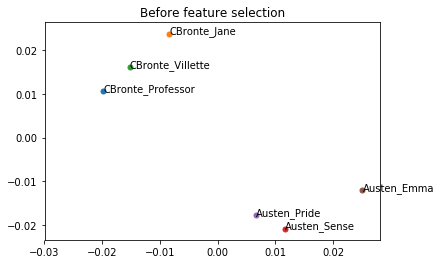

In [95]:
for x, y, name in zip(pos[:, 0], pos[:, 1], names):
  plt.scatter(x, y, s=25)
  plt.text(x, y, name)
  
plt.title("Before feature selection")

Text(0.5, 1.0, 'After Chi2 Feature Selection')

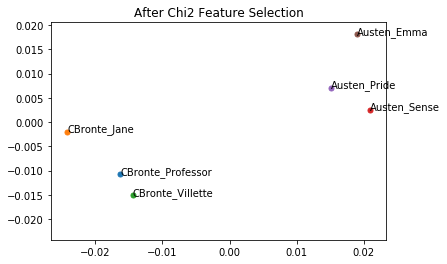

In [97]:
keyness, _ = chi2(dtm, names)
selected = np.argsort(keyness)[::-1][:50]
dtm_chi2 = dtm[:, selected]
dist = 1 - cosine_similarity(dtm_chi2)

mds = MDS(n_components=2, dissimilarity="precomputed")
pos = mds.fit_transform(dist)

for x, y, name in zip(pos[:, 0], pos[:, 1], names):
  plt.scatter(x, y, s=25)
  plt.text(x, y, name)
  
plt.title("After Chi2 Feature Selection")